# 1. Contexto, Objetivos e Perguntas de Pesquisa

--------------------

## Objetivo do Projeto
Realizar uma análise exploratória profunda e aplicar técnicas de ciência de dados para entender a relação entre dependência petrolífera e desempenho econômico da Venezuela ao longo de 64 anos (1960-2024).

##  Perguntas Principais 

- Como o PIB da Venezuela evoluiu ao longo de 64 anos?

- Qual é a relação entre renda do petróleo e crescimento econômico?

- A Venezuela sofre da "maldição dos recursos naturais"?

- Quais eventos históricos impactaram mais a economia?



## Setup & Preparação

In [45]:
pip install pandas numpy matplotlib seaborn statsmodels scipy scikit-learn ruptur plotly

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ruptur (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ruptur


## Carregar os dados do dataset

Os dados foram obtidos através do dataset do kaggle : https://www.kaggle.com/datasets/ibrahimqasimi/venezuela-resource-dependency-and-economy1960-2023

In [46]:
import pandas as pd
df = pd.read_csv('venezuela_wdi_indicators.csv') #le o arquivo
df #mostra o dataframe

,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1960,NaN,NaN,NaN,NaN,7.663938e+09,NaN
1,VEN,1961,NaN,NaN,NaN,NaN,8.067267e+09,3.192519
2,VEN,1962,NaN,NaN,92.362928,0.180690,8.814310e+09,8.532934
3,VEN,1963,NaN,NaN,92.911190,3.766721,9.608717e+09,3.900951
4,VEN,1964,NaN,NaN,91.099545,5.871650,8.192414e+09,11.129345
...,...,...,...,...,...,...,...,...
60,VEN,2020,NaN,NaN,NaN,NaN,4.283802e+10,-29.998570
61,VEN,2021,NaN,NaN,NaN,NaN,5.661498e+10,0.955433
62,VEN,2022,NaN,NaN,NaN,NaN,8.901326e+10,8.000913
63,VEN,2023,NaN,NaN,NaN,NaN,1.023765e+11,4.001686


In [47]:
df.columns

Index(['country_iso3', 'year', 'oil_rents_pct_gdp',
       'total_natural_resource_rents_pct_gdp',
       'fuel_exports_pct_merch_exports',
       'ores_and_metals_exports_pct_merch_exports', 'gdp_current_usd',
       'gdp_growth_pct'],
      dtype='object')

country_iso3 -> País, no caso Venezuela

year -> ano de analise

oil_rents_pct_gdp ->  quanto o petróleo representa do PIB (%)

total_natural_resource_rents_pct_gdp -> peso total dos recursos naturais no PIB (%)

fuel_exports_pct_merch_exports -> porcentagem de combustíveis nas exportações

ores_and_metals_exports_pct_merch_exports -> porcentagem de minérios e metais nas exportações

gdp_current_usd ->PIB em dólares correntes

gdp_growth_pct ->  crescimento do PIB no ano (%)

In [48]:
df.head(30) #as 30 primeiras lihas

,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1960,NaN,NaN,NaN,NaN,7.663938e+09,NaN
1,VEN,1961,NaN,NaN,NaN,NaN,8.067267e+09,3.192519
2,VEN,1962,NaN,NaN,92.362928,0.180690,8.814310e+09,8.532934
3,VEN,1963,NaN,NaN,92.911190,3.766721,9.608717e+09,3.900951
4,VEN,1964,NaN,NaN,91.099545,5.871650,8.192414e+09,11.129345
5,VEN,1965,NaN,NaN,92.518557,4.659653,8.427778e+09,4.162867
6,VEN,1966,NaN,NaN,93.401158,4.964472,8.781333e+09,1.510250
7,VEN,1967,NaN,NaN,93.421344,4.351396,9.250000e+09,2.833869
8,VEN,1968,NaN,NaN,93.461653,4.127013,1.003444e+10,7.337233
9,VEN,1969,NaN,NaN,92.359253,5.035540,1.028511e+10,0.706037


De imediato, observa-se a presença de diversos valores nulos, indicando a necessidade de realizar um tratamento dos dados antes da análise e da preparação do modelo de previsão.

- Primeiro, irei analisar quantos dados nulos existe em cada coluna:

In [49]:
df.isna().sum() 

country_iso3                                  0
year                                          0
oil_rents_pct_gdp                            20
total_natural_resource_rents_pct_gdp         20
fuel_exports_pct_merch_exports               16
ores_and_metals_exports_pct_merch_exports    16
gdp_current_usd                               0
gdp_growth_pct                                1
dtype: int64

- vemos uma quantidade muito grande de dados nulos nas principais colunas que iremos analisar, as que tem os dados de petróleo e metais.

Como se tratam de variáveis relevantes para a análise e não há registros disponíveis para os anos anteriores a 1970, optei por excluir os dados anteriores a esse período, mantendo a análise restrita aos anos a partir de 1970, nos quais as informações estão completas.

In [50]:
df = df[df['year'] >= 1970].reset_index(drop=True) #Manter os dados acima de 1970
df.head()


,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1970,4.799272,5.487721,91.015971,5.807845,1.156111e+10,7.711914
1,VEN,1971,6.787192,7.387941,91.523845,5.503732,1.298659e+10,1.479291
2,VEN,1972,6.691746,7.192719,90.574042,5.032713,1.397773e+10,1.282805
3,VEN,1973,10.286674,10.755443,93.089806,4.354791,1.703558e+10,7.109958
4,VEN,1974,33.340228,33.947884,95.130787,2.873486,2.610093e+10,2.069333


In [51]:
df

,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1970,4.799272,5.487721,91.015971,5.807845,1.156111e+10,7.711914
1,VEN,1971,6.787192,7.387941,91.523845,5.503732,1.298659e+10,1.479291
2,VEN,1972,6.691746,7.192719,90.574042,5.032713,1.397773e+10,1.282805
3,VEN,1973,10.286674,10.755443,93.089806,4.354791,1.703558e+10,7.109958
4,VEN,1974,33.340228,33.947884,95.130787,2.873486,2.610093e+10,2.069333
5,VEN,1975,24.023362,24.891501,94.640486,3.359402,2.746465e+10,2.896258
6,VEN,1976,22.150940,22.993151,93.827282,3.631743,3.141953e+10,7.727740
7,VEN,1977,15.743835,16.198534,92.611057,4.937538,3.621070e+10,6.270784
8,VEN,1978,15.461522,15.826400,94.467874,2.887393,3.931628e+10,2.346896
9,VEN,1979,35.900591,36.481381,92.763317,4.923059,4.831093e+10,0.764355


- Agora vou verificar se ainda existem dados nulos após o filtro de 1970:

In [52]:
# Verificar dados nulos após filtro de 1970
print("Valores nulos por coluna após filtro de 1970:")
print(df.isna().sum())
print("\nPercentual de valores nulos:")
print(round((df.isna().sum() / len(df)) * 100, 2))

# Identificar quais anos têm dados faltantes nas colunas críticas
print("\n--- Anos com dados faltantes de petróleo ---")
anos_sem_oil = df[df['oil_rents_pct_gdp'].isna()]['year'].tolist()
if anos_sem_oil:
    print(f"Anos sem dados de 'oil_rents_pct_gdp': {anos_sem_oil}")
else:
    print("Todos os anos têm dados de petróleo!")

Valores nulos por coluna após filtro de 1970:
country_iso3                                  0
year                                          0
oil_rents_pct_gdp                            10
total_natural_resource_rents_pct_gdp         10
fuel_exports_pct_merch_exports               14
ores_and_metals_exports_pct_merch_exports    14
gdp_current_usd                               0
gdp_growth_pct                                0
dtype: int64

Percentual de valores nulos:
country_iso3                                  0.00
year                                          0.00
oil_rents_pct_gdp                            18.18
total_natural_resource_rents_pct_gdp         18.18
fuel_exports_pct_merch_exports               25.45
ores_and_metals_exports_pct_merch_exports    25.45
gdp_current_usd                               0.00
gdp_growth_pct                                0.00
dtype: float64

--- Anos com dados faltantes de petróleo ---
Anos sem dados de 'oil_rents_pct_gdp': [2015, 2016, 2017, 

- Observa-se que ainda há valores nulos após 1970, principalmente nos anos mais recentes (2015-2024). Para a análise de correlação e modelos preditivos, é necessário tratar esses dados. Vou utilizar interpolação linear para preencher os valores faltantes, pois essa técnica é apropriada para séries temporais econômicas.

In [53]:
# Tratamento de valores nulos usando interpolação linear
df_interpolated = df.copy()

# Interpolar as colunas com valores nulos
colunas_interpolar = ['oil_rents_pct_gdp', 'total_natural_resource_rents_pct_gdp', 
                      'fuel_exports_pct_merch_exports', 'ores_and_metals_exports_pct_merch_exports']

for col in colunas_interpolar:
    df_interpolated[col] = df_interpolated[col].interpolate(method='linear')

# Verificar se ainda há nulos
print("Valores nulos após interpolação:")
print(df_interpolated.isna().sum())

# Atualizar o dataframe principal
df = df_interpolated.copy()

Valores nulos após interpolação:
country_iso3                                 0
year                                         0
oil_rents_pct_gdp                            0
total_natural_resource_rents_pct_gdp         0
fuel_exports_pct_merch_exports               0
ores_and_metals_exports_pct_merch_exports    0
gdp_current_usd                              0
gdp_growth_pct                               0
dtype: int64


- Com os dados interpolados, agora posso prosseguir com a análise exploratória sem o risco de viés causado por valores faltantes.

# 2. Análise Exploratória de Dados (EDA)

--------------------

## Estatísticas Descritivas

In [54]:
df.describe()# Estatísticas descritivas completas

,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
count,55.00000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000
mean,1997.00000,16.628991,17.335136,89.279126,3.343928,1.053311e+11,0.154267
std,16.02082,7.063549,7.197891,8.085714,2.232358,9.250480e+10,9.200050
min,1970.00000,4.799272,5.487721,67.196607,0.046018,1.156111e+10,-29.998570
25%,1983.50000,11.302151,11.846508,82.331147,1.048915,5.103020e+10,-2.775817
50%,1997.00000,15.386604,15.916631,92.763317,3.359402,7.054321e+10,2.346896
75%,2010.50000,21.398303,22.444368,95.663343,5.027332,1.165149e+11,6.070079
max,2024.00000,35.900591,36.481381,98.763731,7.699365,3.931924e+11,18.286607


## Análise de Correlação

In [55]:
# Matriz de correlação - selecionando apenas colunas numéricas (excluindo country_iso3)
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

                                               year  oil_rents_pct_gdp  \
year                                       1.000000          -0.197622   
oil_rents_pct_gdp                         -0.197622           1.000000   
total_natural_resource_rents_pct_gdp      -0.191114           0.999560   
fuel_exports_pct_merch_exports             0.206636          -0.101479   
ores_and_metals_exports_pct_merch_exports -0.695469           0.093730   
gdp_current_usd                            0.555953           0.038770   
gdp_growth_pct                            -0.323095           0.211381   

                                           total_natural_resource_rents_pct_gdp  \
year                                                                  -0.191114   
oil_rents_pct_gdp                                                      0.999560   
total_natural_resource_rents_pct_gdp                                   1.000000   
fuel_exports_pct_merch_exports                                        -0.10

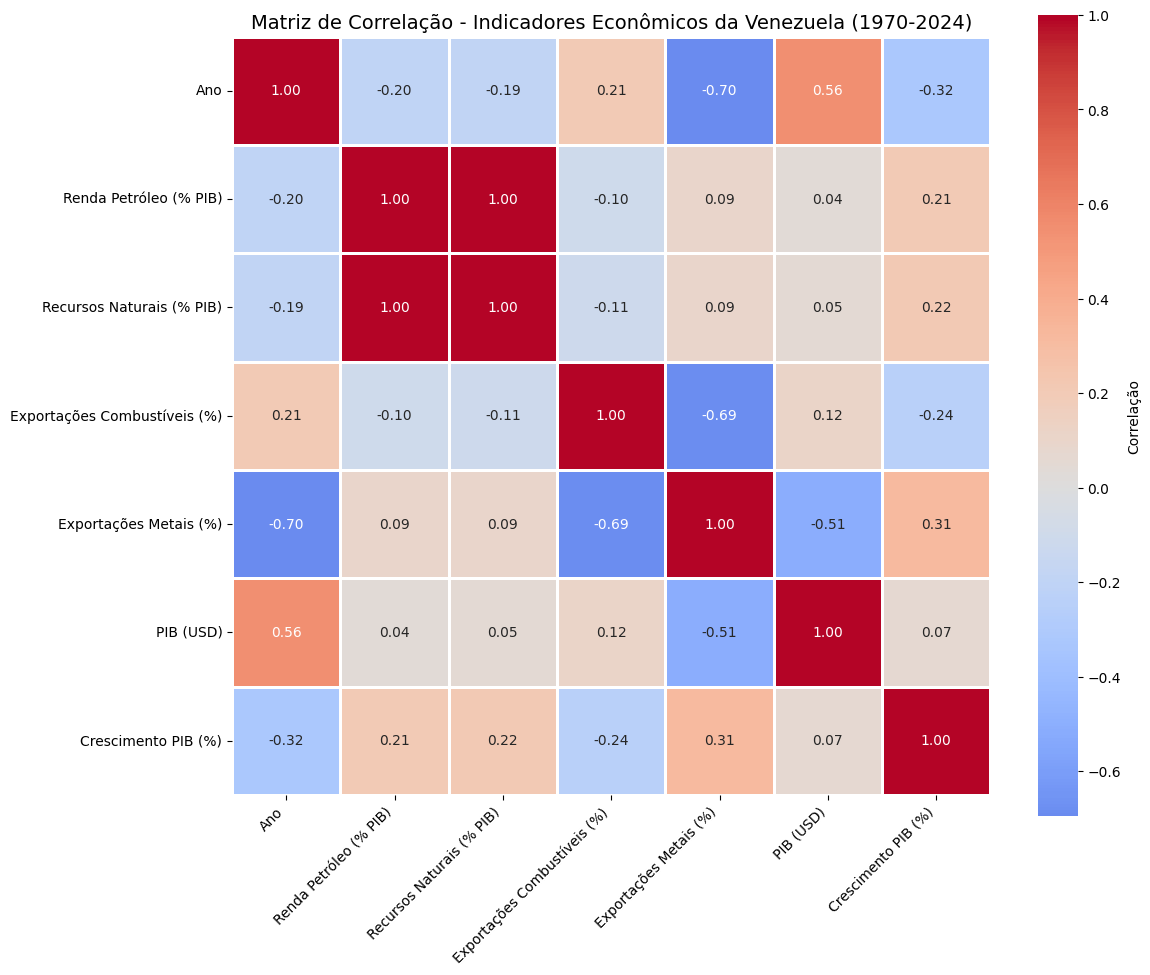

In [74]:
# Visualização da matriz de correlação com heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Traduzir os nomes das colunas para português
nomes_portugues = {
    'year': 'Ano',
    'oil_rents_pct_gdp': 'Renda Petróleo (% PIB)',
    'total_natural_resource_rents_pct_gdp': 'Recursos Naturais (% PIB)',
    'fuel_exports_pct_merch_exports': 'Exportações Combustíveis (%)',
    'ores_and_metals_exports_pct_merch_exports': 'Exportações Metais (%)',
    'gdp_current_usd': 'PIB (USD)',
    'gdp_growth_pct': 'Crescimento PIB (%)'
}

# Renomear as colunas da matriz de correlação
correlation_matrix_pt = correlation_matrix.rename(columns=nomes_portugues, index=nomes_portugues)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_pt, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação - Indicadores Econômicos da Venezuela (1970-2024)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

A matriz revela uma economia venezuelana extremamente dependente do petróleo (correlação perfeita 1.00 com recursos naturais), mas que paradoxalmente não converteu essa riqueza em crescimento sustentável (correlação fraca de 0.21 entre renda petrolífera e crescimento do PIB). O tempo mostra deterioração econômica, com forte declínio nas exportações de metais (-0.70) e desaceleração do crescimento (-0.32). A correlação negativa entre exportações de combustíveis e metais (-0.69) evidencia falta de diversificação, caracterizando uma economia vulnerável concentrada em um único setor que não gerou desenvolvimento econômico robusto ao longo de 54 anos.

## Visualizações de Séries Temporais

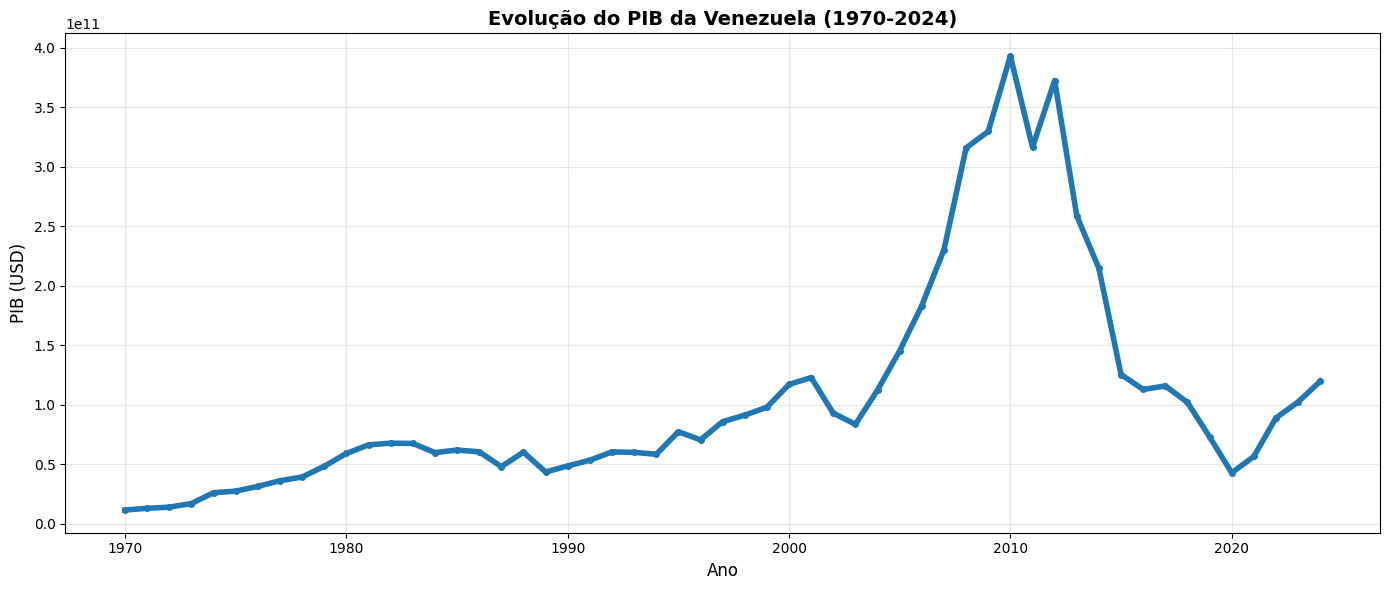

In [76]:
# Evolução do PIB ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df['year'], df['gdp_current_usd'], marker='o', linewidth=4, markersize=4)
plt.title('Evolução do PIB da Venezuela (1970-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

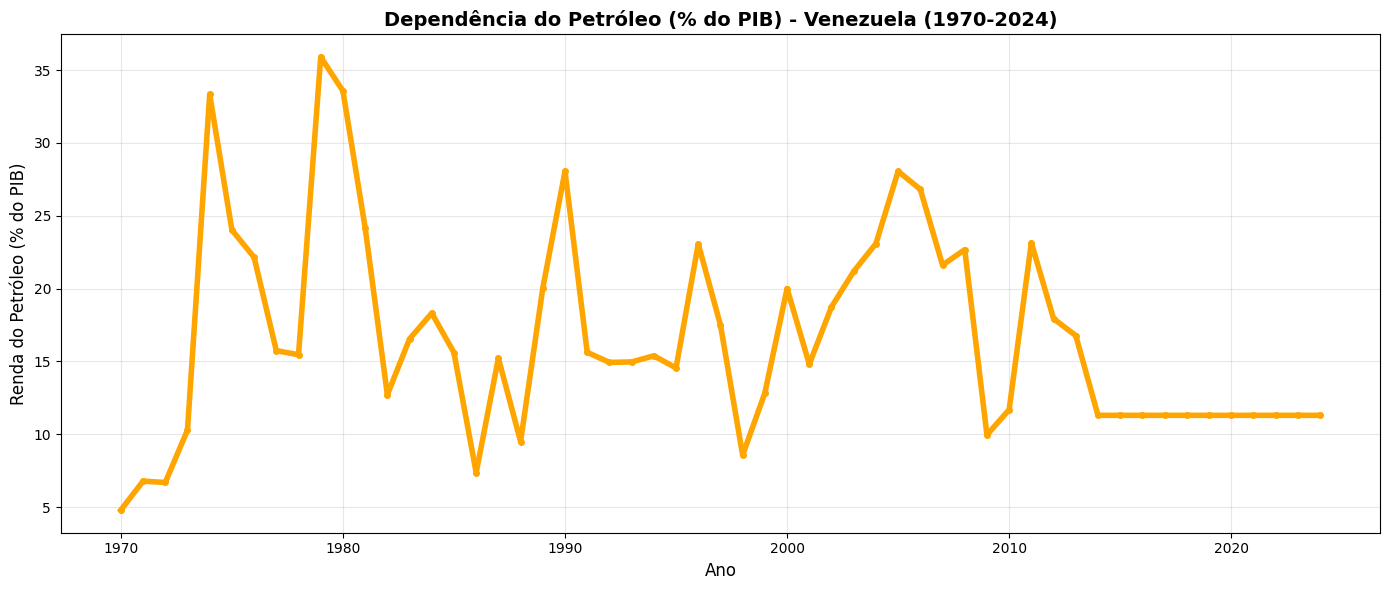

In [77]:
# Evolução da dependência do petróleo
plt.figure(figsize=(14, 6))
plt.plot(df['year'], df['oil_rents_pct_gdp'], marker='o', color='orange', linewidth=4, markersize=4)
plt.title('Dependência do Petróleo (% do PIB) - Venezuela (1970-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Renda do Petróleo (% do PIB)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico demonstra extrema volatilidade na dependência petrolífera venezuelana, oscilando entre 5% e 36% do PIB ao longo de 54 anos, com picos notáveis nos choques do petróleo de 1974-1975 (~33%), 1980-1981 (~36%), e durante a era Chávez nos anos 2000 (~28%). A dependência média histórica situa-se entre 15-25% do PIB, mas apresenta quedas dramáticas durante crises de preços (como em 1986 e 1998, caindo para ~8-10%) e elevações durante booms petrolífros. Após 2014, não há mais dados disponíveis no dataset, mas o gráfico até então mostra uma estabilização em torno de 11-12%, possivelmente refletindo o início da crise que levaria ao colapso econômico subsequente. A alta volatilidade ao longo de décadas evi

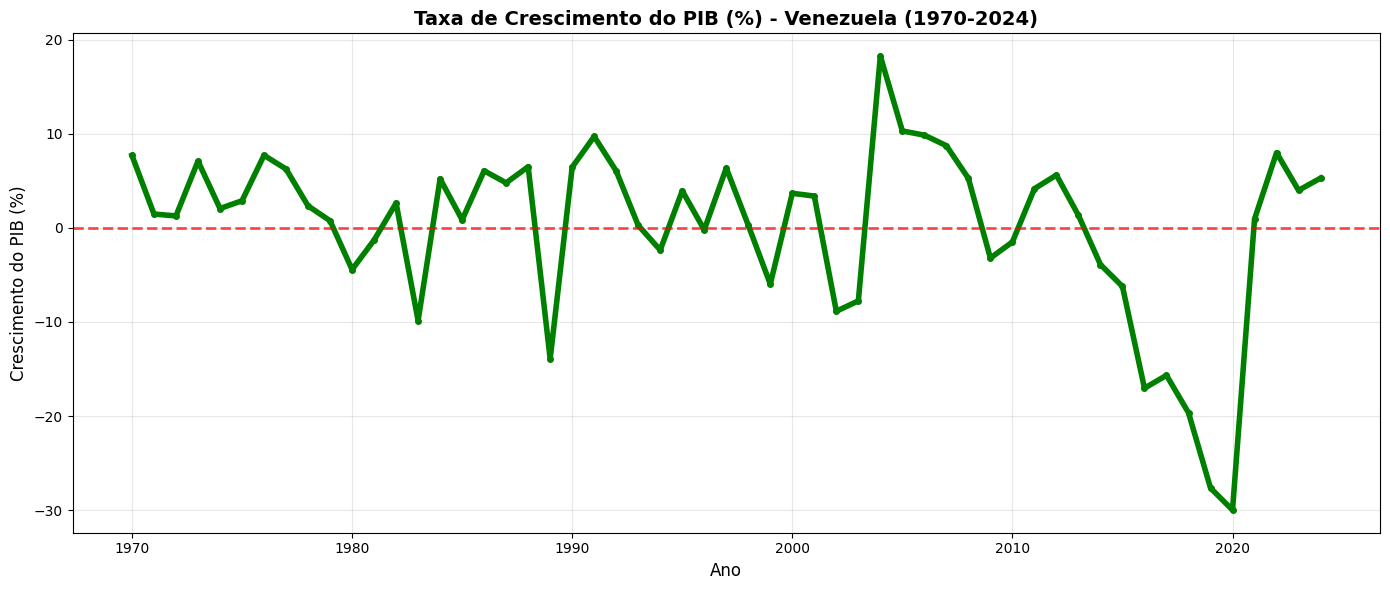

In [78]:
# Crescimento do PIB ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df['year'], df['gdp_growth_pct'], marker='o', color='green', linewidth=4, markersize=4)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.title('Taxa de Crescimento do PIB (%) - Venezuela (1970-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Crescimento do PIB (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

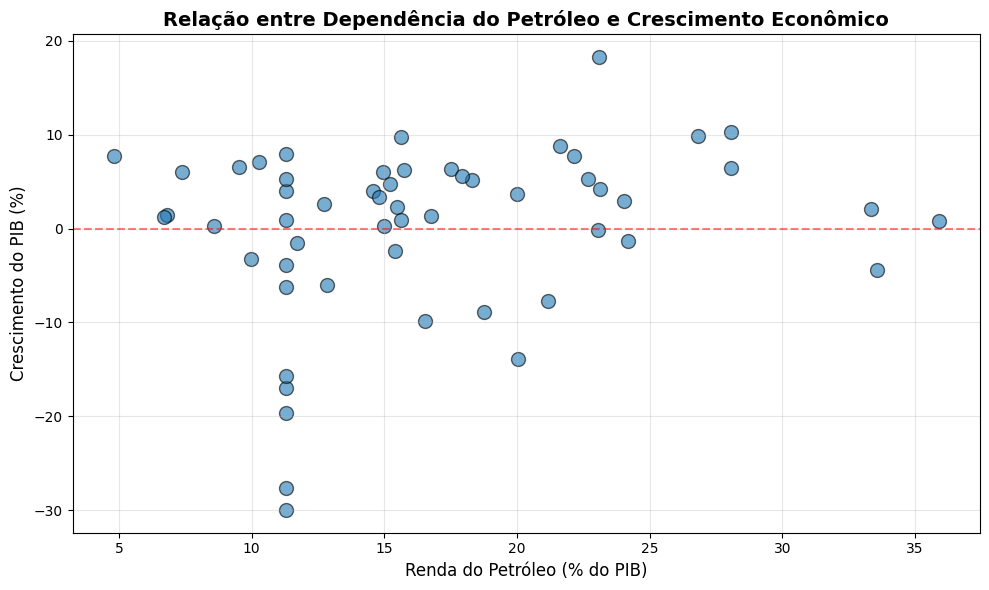

In [60]:
# Relação entre petróleo e crescimento econômico (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['oil_rents_pct_gdp'], df['gdp_growth_pct'], alpha=0.6, s=100, edgecolors='black')
plt.xlabel('Renda do Petróleo (% do PIB)', fontsize=12)
plt.ylabel('Crescimento do PIB (%)', fontsize=12)
plt.title('Relação entre Dependência do Petróleo e Crescimento Econômico', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()